In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from statsmodels.api import OLS
import statsmodels.api as sm



%matplotlib inline

import seaborn as sns

sns.set()

C:\Users\genie\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\genie\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\genie\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load pickle data and define X,Y

In [3]:
stockdf = pd.read_pickle("035720.bz2")

In [4]:
y_data = stockdf.등락률[:-1]
x_data = stockdf.iloc[:,stockdf.columns != '등락률'][1:]
x_data = x_data.drop('날짜',axis=1)

# Split Train and Test 0.75 : 0.25

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.25, random_state=42)

# Exploratory Data Analysis

In [6]:
stockdf.corr()

,등락률,기관 순매매량,외국인 순매매량,외국인 보유율,종가,시가,고가,저가,거래량,기간
등락률,1.000000,0.496914,0.219724,0.013221,0.023653,-0.079063,-0.029506,-0.030781,-0.006049,-0.059190
기관 순매매량,0.496914,1.000000,-0.062476,0.043178,0.159250,0.108997,0.131259,0.135362,0.222434,0.044224
외국인 순매매량,0.219724,-0.062476,1.000000,0.064913,-0.156282,-0.185715,-0.176292,-0.171103,-0.081782,-0.092361
외국인 보유율,0.013221,0.043178,0.064913,1.000000,0.301238,0.294684,0.295340,0.302273,0.113947,0.229043
종가,0.023653,0.159250,-0.156282,0.301238,1.000000,0.993112,0.997047,0.997093,0.303791,0.525714
시가,-0.079063,0.108997,-0.185715,0.294684,0.993112,1.000000,0.997313,0.997340,0.305055,0.524669
고가,-0.029506,0.131259,-0.176292,0.295340,0.997047,0.997313,1.000000,0.997122,0.325991,0.525593
저가,-0.030781,0.135362,-0.171103,0.302273,0.997093,0.997340,0.997122,1.000000,0.285294,0.527528
거래량,-0.006049,0.222434,-0.081782,0.113947,0.303791,0.305055,0.325991,0.285294,1.000000,-0.066279
기간,-0.059190,0.044224,-0.092361,0.229043,0.525714,0.524669,0.525593,0.527528,-0.066279,1.000000


0.1575725593667546

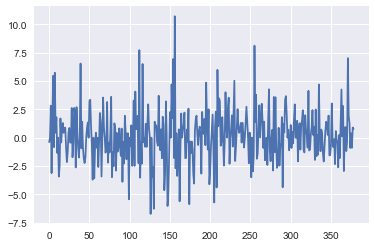

In [7]:
plt.plot(y_data)
y_data.mean()

# Standardzation

In [9]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scale = pd.DataFrame(data = scale.transform(X_train), columns = X_train.columns.tolist())
X_test_scale = pd.DataFrame(data = scale.transform(X_test), columns = X_test.columns.tolist())

# OLS model

In [10]:

X_train_scale_add = sm.add_constant(X_train_scale)
X_test_scale_add = sm.add_constant(X_test_scale)
y_train_re = y_train.values.reshape(-1,1)
y_test_re = y_test.values.reshape(-1,1)
OLSmodel = OLS(y_train_re,X_train_scale_add).fit()
OLSmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     3.442
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           0.000490
Time:                        15:54:21   Log-Likelihood:                -625.99
No. Observations:                 284   AIC:                             1272.
Df Residuals:                     274   BIC:                             1308.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1596      0.132      1.205      0.229      -0.101       0.420
기관 순매매량        0.6395      0.157      4.061      0.000       0.329       0.950
외국인 순매매량       0.2233      0.142      1.574      0.117      -0.056       0.503
외국인 보유율        0.1007      0.143      0.706      0.480      -0.180       0.381
종가            -2.6087      2.687     -0.971      0.333      -7.899       2.682
시가             5.3258      2.891      1.842      0.067      -0.366      11.017
고가             4.4587      3.224      1.383      0.168      -1.887      10.805
저가            -7.3169      3.327     -2.199      0.029     -13.867      -0.767
거래량           -0.6039      0.188     -3.204      0.002      -0.975      -0.233
기간            -0.2117      0.165     -1.286      0.199      -0.536       0.112
==============================================================================
Omnibus:                       21.906   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.540
Skew:                           0.417   Prob(JB):                     5.79e-10
Kurtosis:                       4.703   Cond. No.                         79.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
yhat = OLSmodel.predict(X_test_scale_add)
print("rscore {0}".format(r2_score(y_test,yhat)))
print("mean of profit : {0}".format(OLSmodel.predict(X_test_scale_add).mean()))


rscore -0.07109139938631515
mean of profit : 0.2194733497919889


# Linear model, Ridge and Lasso (cross validation)

In [12]:
linearmodel = LinearRegression().fit(X_train_scale,y_train)
print("rscore {0}".format(linearmodel.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(linearmodel.predict(X_test_scale).mean()))
{k: v for k,v in zip(X_train_scale.columns, linearmodel.coef_.ravel())}

rscore -0.07109139938631515
mean of profit : 0.2194733497919909


{'거래량': -0.6038838995727712,
 '고가': 4.45868209913728,
 '기간': -0.21170919940580074,
 '기관 순매매량': 0.6395089187823471,
 '시가': 5.325824356076458,
 '외국인 보유율': 0.10069299291096899,
 '외국인 순매매량': 0.22329197425159242,
 '저가': -7.316880447576435,
 '종가': -2.6086563036863426}

In [13]:
Ridge = RidgeCV().fit(X_train_scale,y_train)
print("rscore {0}".format(Ridge.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(Ridge.predict(X_test_scale).mean()))
{k: v for k,v in zip(X_train_scale.columns, Ridge.coef_.ravel())}

rscore -0.06383842341159385
mean of profit : 0.2184031264810883


{'거래량': -0.5473516959723668,
 '고가': 3.9488675476305275,
 '기간': -0.200121211736203,
 '기관 순매매량': 0.6082480241593657,
 '시가': 4.428783899866573,
 '외국인 보유율': 0.08760505784208306,
 '외국인 순매매량': 0.208565486086826,
 '저가': -5.798970438925409,
 '종가': -2.738981804256696}

In [14]:
Lassomodel = LassoCV().fit(X_train_scale,y_train)
print("rscore {0}".format(Lassomodel.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(Lassomodel.predict(X_test_scale).mean()))

C:\Users\genie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


rscore -0.06348231928402615
mean of profit : 0.2152486906666355


C:\Users\genie\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Random Forest Regression

In [15]:
RandomRegression = RandomForestRegressor().fit(X_train_scale,y_train)
print("rscore {0}".format(RandomRegression.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(RandomRegression.predict(X_test_scale).mean()))

rscore -0.17408631428171706
mean of profit : 0.39172631578947376


# AdaBoost Regression

In [16]:
Adaregressor = AdaBoostRegressor().fit(X_train_scale,y_train)
print("rscore {0}".format(linearmodel.score(X_test_scale,y_test)))
print("mean of profit : {0}".format(linearmodel.predict(X_test_scale).mean()))

rscore -0.07109139938631515
mean of profit : 0.2194733497919909


# Evaluating model function

In [17]:
def evaluate_strategy(model, df, profit, cutoff=None, showprint=True):
    # see where our model says to invest
    inv = model.predict(df)
    if cutoff is not None: 
        inv = inv > cutoff
        inv = inv.reshape(-1)
    # return the mean return
    if showprint:
        print("Positive result on %d out of %d (%0.2f%%)" % (inv.sum(), inv.shape[0], inv.sum() / inv.shape[0] * 100.0))
        print("Mean return of strategy:", profit[inv].mean())
        print("Overall return:", profit.mean())
    return profit[inv].mean(), profit.mean()

In [18]:
y_train_cat = y_train > 0
y_test_cat = y_test >0

# Classification model

In [19]:
Logist =LogisticRegressionCV().fit(X_train_scale, y_train_cat)
print(accuracy_score(y_test_cat,Logist.predict(X_test_scale)))
evaluate_strategy(Logist,X_test_scale,y_test)

0.4631578947368421
Positive result on 34 out of 95 (35.79%)
Mean return of strategy: -0.2958823529411765
Overall return: 0.15147368421052626


(-0.2958823529411765, 0.15147368421052626)

In [20]:
Decision = DecisionTreeClassifier().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,Decision.predict(X_test_scale)))
evaluate_strategy(Decision,X_test_scale,y_test)

0.5157894736842106
Positive result on 43 out of 95 (45.26%)
Mean return of strategy: 0.31837209302325603
Overall return: 0.15147368421052626


(0.31837209302325603, 0.15147368421052626)

In [21]:
RandomForest = RandomForestClassifier().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,RandomForest.predict(X_test_scale)))
evaluate_strategy(RandomForest,X_test_scale,y_test)

0.45263157894736844
Positive result on 31 out of 95 (32.63%)
Mean return of strategy: -0.3212903225806451
Overall return: 0.15147368421052626


(-0.3212903225806451, 0.15147368421052626)

In [22]:
AdaCL = AdaBoostClassifier(n_estimators=300,learning_rate=0.05).fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,AdaCL.predict(X_test_scale)))
evaluate_strategy(AdaCL,X_test_scale,y_test)


0.5473684210526316
Positive result on 44 out of 95 (46.32%)
Mean return of strategy: 0.384090909090909
Overall return: 0.15147368421052626


(0.384090909090909, 0.15147368421052626)

# Adding polynomial variables

In [23]:
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train_scale)
X_test_poly = poly.fit_transform(X_test_scale)

newscaler = StandardScaler().fit(X_train_poly)

X_train_poly = newscaler.transform(X_train_poly)
X_test_poly = newscaler.transform(X_test_poly)

In [24]:
polylog = LogisticRegressionCV().fit(X_train_poly,y_train_cat)
print(accuracy_score(y_test_cat,polylog.predict(X_test_poly)))
evaluate_strategy(polylog,X_test_poly,y_test)


0.5052631578947369
Positive result on 24 out of 95 (25.26%)
Mean return of strategy: -0.017499999999999977
Overall return: 0.15147368421052626


(-0.017499999999999977, 0.15147368421052626)

In [25]:
polyridge = RidgeCV().fit(X_train_poly,y_train)
print("rscore {0}".format(polyridge.score(X_test_poly,y_test)))
print("mean of profit : {0}".format(polyridge.predict(X_test_poly).mean()))

rscore -0.43888142621803516
mean of profit : 0.20308272760436602


# SVM, LDA, QDA, KNN

In [26]:
SVM = SVC().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,SVM.predict(X_test_scale)))
evaluate_strategy(SVM,X_test_scale,y_test)


0.4842105263157895
Positive result on 44 out of 95 (46.32%)
Mean return of strategy: -0.023409090909090945
Overall return: 0.15147368421052626


(-0.023409090909090945, 0.15147368421052626)

In [27]:
LDA =LinearDiscriminantAnalysis().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,LDA.predict(X_test_scale)))
evaluate_strategy(LDA,X_test_scale,y_test)

0.5684210526315789
Positive result on 42 out of 95 (44.21%)
Mean return of strategy: 0.4285714285714287
Overall return: 0.15147368421052626


(0.4285714285714287, 0.15147368421052626)

In [28]:
QDA = QuadraticDiscriminantAnalysis().fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,QDA.predict(X_test_scale)))
evaluate_strategy(QDA,X_test_scale,y_test)

0.5052631578947369
Positive result on 32 out of 95 (33.68%)
Mean return of strategy: 0.13468750000000002
Overall return: 0.15147368421052626


(0.13468750000000002, 0.15147368421052626)

In [29]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train_scale,y_train_cat)
print(accuracy_score(y_test_cat,KNN.predict(X_test_scale)))
evaluate_strategy(KNN,X_test_scale,y_test)

0.5578947368421052
Positive result on 57 out of 95 (60.00%)
Mean return of strategy: 0.38982456140350896
Overall return: 0.15147368421052626


(0.38982456140350896, 0.15147368421052626)

# Neural Network, Deep learning

In [30]:
model_nn = Sequential()
model_nn.add(Dense(715, input_dim=X_train_poly.shape[1], activation='relu'))
model_nn.add(Dense(500, activation='relu'))
model_nn.add(Dense(300, activation='relu'))
model_nn.add(Dense(150, activation='relu'))
model_nn.add(Dense(100, activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='linear'))
model_nn.compile(loss='mse', optimizer='adam')
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 715)               511940    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               358000    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
__________

In [31]:
model_nn.fit(X_train_poly, y_train_cat, epochs=50, batch_size=715, validation_split=0.2)

Train on 227 samples, validate on 57 samples
Epoch 1/50
227/227 [==============================] - 1s 5ms/step - loss: 0.5928 - val_loss: 0.3945
Epoch 2/50
227/227 [==============================] - 0s 338us/step - loss: 0.5068 - val_loss: 0.3751
Epoch 3/50
227/227 [==============================] - 0s 309us/step - loss: 0.3021 - val_loss: 0.3761
Epoch 4/50
227/227 [==============================] - 0s 278us/step - loss: 0.2899 - val_loss: 0.3691
Epoch 5/50
227/227 [==============================] - 0s 289us/step - loss: 0.2671 - val_loss: 0.2972
Epoch 6/50
227/227 [==============================] - 0s 287us/step - loss: 0.2382 - val_loss: 0.2704
Epoch 7/50
227/227 [==============================] - 0s 256us/step - loss: 0.2411 - val_loss: 0.2964
Epoch 8/50
227/227 [==============================] - 0s 294us/step - loss: 0.2190 - val_loss: 0.3025
Epoch 9/50
227/227 [==============================] - 0s 266us/step - loss: 0.2164 - val_loss: 0.3196
Epoch 10/50
227/227 [==================

In [32]:
r2_score(y_test,model_nn.predict(X_test_poly))

-0.03551161372384115

# ensemble model with 
## ["Singletree",'RF', 'Ada', 'Logit', 'QDA','LDA','KNN']

In [33]:
list_model = ["Singletree",'RF', 'Ada', 'Logit', 'QDA','LDA','KNN']
model_dict = [Decision,RandomForest,AdaCL,Logist,QDA,LDA,KNN]
tune_index_name =['train row {0}'.format(i+1) for i in range(len(X_train_scale))]
ensemble_test_index_name =['test row {0}'.format(i+1) for i in range(len(X_test_scale))]                
                                                                                                                                    
#make empty dataframe with index i made
ensemble_tune = pd.DataFrame(index=tune_index_name)
ensemble_test = pd.DataFrame(index=ensemble_test_index_name)

#make dataset with prediction.
for n,i in zip(list_model,model_dict):
    ensemble_tune["{0}'s model prediction".format(n)] = [i[1] for i in i.predict_proba(X_train_scale)]
    ensemble_test["{0}'s model prediction".format(n)] = [i[1] for i in i.predict_proba(X_test_scale)]


In [34]:
metamodel = LogisticRegressionCV().fit(ensemble_tune,y_train_cat)
print(accuracy_score(y_test_cat,metamodel.predict(ensemble_test)))
evaluate_strategy(metamodel,ensemble_test,y_test)

0.5052631578947369
Positive result on 42 out of 95 (44.21%)
Mean return of strategy: 0.30547619047619057
Overall return: 0.15147368421052626


(0.30547619047619057, 0.15147368421052626)

In [35]:
X_tommorow = pd.DataFrame(data = scale.transform(x_data[0:10]), columns = X_train.columns.tolist())

poly = PolynomialFeatures(4)

X_tommorow_poly = poly.fit_transform(X_tommorow)

X_tommorow_poly = newscaler.transform(X_tommorow_poly)
X_tommorow_poly

array([[ 0.        ,  0.90353714, -0.15758999, ..., -0.04015855,
        -1.44587618,  3.41689895],
       [ 0.        ,  1.00381798, -0.08484454, ..., -0.09884921,
        -1.17017435,  3.30386542],
       [ 0.        ,  0.1083779 , -0.00347045, ..., -0.20825055,
        -0.43084144,  3.2482268 ],
       ...,
       [ 0.        ,  0.03039677,  0.12381803, ...,  0.61886532,
        -2.93342008,  2.87477141],
       [ 0.        , -0.19839827,  0.19640917, ...,  0.66582214,
        -2.9494349 ,  2.72307878],
       [ 0.        , -0.39994888, -0.09068912, ...,  0.26000638,
        -2.14166126,  2.6736002 ]])

In [36]:
today_meta = pd.DataFrame(index=stockdf.날짜[0:10])
for n,i in zip(list_model,model_dict):
    today_meta["{0}'s model prediction".format(n)] = [i[1] for i in i.predict_proba(X_tommorow)]
metamodel.predict(today_meta)

array([False, False,  True,  True,  True, False, False,  True,  True,
       False])

# Whole result (tommorow's predicted price)

In [37]:
all_model = ['linearmodel','Lassomodel','Ridge','polyridge','RandomRegression','Adaregressor',
        'model_nn','Logist','polylog','Decision','RandomForest','AdaCL','SVM','LDA','QDA','KNN','metamodel']

all_dict = [linearmodel,Lassomodel,Ridge,polyridge,RandomRegression,Adaregressor,
           model_nn,Logist,polylog,Decision,RandomForest,AdaCL,SVM,LDA,QDA,KNN,metamodel]

Regression = ['linearmodel','Lassomodel','Ridge','polyridge','RandomRegression','Adaregressor',
           'model_nn']
Regression_model = [linearmodel,Lassomodel,Ridge,polyridge,RandomRegression,Adaregressor,
           model_nn]


Logistic = ['Logist','polylog','Decision','RandomForest','AdaCL','SVM','LDA','QDA','KNN','metamodel']
Logistic_model = [Logist,Decision,RandomForest,AdaCL,LDA,QDA,KNN]
Polynomial = [polyridge,model_nn,polylog]
index = []

for i in range(10):
    index.append("{0}'s next day".format(stockdf.날짜[i]))




result = pd.DataFrame(index=index,columns=all_model)

for n,i in zip(all_model,all_dict):
    if i in Polynomial:
        result[n] =i.predict(X_tommorow_poly)
    elif i == metamodel:
        result[n] =metamodel.predict(today_meta)
    else:
        result[n] =i.predict(X_tommorow)
    
result["mean"] = result[Regression].mean(axis=1)

result["percentage of true"] = result[Logistic].mean(axis=1)
result["true"] = [0]+[i for i in y_data[0:9]]

In [40]:
result

,linearmodel,Lassomodel,Ridge,polyridge,RandomRegression,Adaregressor,model_nn,Logist,polylog,Decision,RandomForest,AdaCL,SVM,LDA,QDA,KNN,metamodel,mean,percentage of true,true
2018-08-17 00:00:00's next day,-0.076754,-0.044036,-0.051200,0.839854,2.246,0.320948,0.188983,False,False,False,False,False,False,False,False,True,False,0.489114,0.1,0.00
2018-08-16 00:00:00's next day,0.540397,0.495657,0.460510,1.247885,0.720,0.154662,0.161943,False,False,False,False,False,False,False,False,True,False,0.540150,0.1,-0.39
2018-08-14 00:00:00's next day,0.629075,0.534262,0.533266,-0.168609,2.870,0.416437,0.708761,False,False,True,True,False,False,False,False,False,True,0.789027,0.3,0.00
2018-08-13 00:00:00's next day,1.625081,1.480283,1.547279,3.457145,-0.083,-0.095986,0.930660,True,True,True,False,True,True,True,True,False,True,1.265923,0.8,2.82
2018-08-10 00:00:00's next day,0.966997,0.914726,0.893352,1.664099,0.856,0.275185,1.060884,True,True,True,True,True,False,True,True,False,True,0.947321,0.8,-3.12
2018-08-09 00:00:00's next day,0.954031,0.697609,0.853862,0.888623,2.420,-0.110156,0.267867,False,False,False,False,False,False,True,True,True,False,0.853119,0.3,1.99
2018-08-08 00:00:00's next day,-0.141915,-0.148124,-0.204662,0.046012,-0.771,0.320948,0.375717,False,False,False,False,False,False,False,False,True,False,-0.074718,0.1,5.46
2018-08-07 00:00:00's next day,0.036538,0.091946,0.073597,-0.240539,0.783,0.235370,1.026124,False,False,True,False,False,False,False,False,True,True,0.286577,0.3,-0.83
2018-08-06 00:00:00's next day,-0.451534,-0.318611,-0.362734,-0.515505,0.209,0.164880,0.856587,False,False,True,True,True,False,False,False,False,True,-0.059702,0.4,5.73
2018-08-03 00:00:00's next day,0.272946,0.088939,0.274485,-0.640060,0.171,-0.258947,0.376105,False,False,False,False,False,False,False,False,False,False,0.040638,0.0,0.44


In [42]:
# the value's standard is % based on today's stock price.
# True = tomorrow gonna be +, positive return
# False = negative.
# 'true' column is actual result.
#recent 'true' is defalut zero because we do not have tomorrow's actual data.